<div style="text-align: right"> 

### DATA 22100 - Introduction to Machine Learning

</div>

<img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/UChicago_DSI.png" align="right" alt="UC-DSI" width="300">






<center> 

# A brief intro to Long Short-Term Memory (LSTM) networks
    
<br>
    
</center> 

    

### Simple RNNs are difficult to train because of the exploding/vanishing gradient problem

A popular solution to this problem involves tweaking the structure of the recurrent cell, which makes the recurring unit more complicated.   

In brief, instead of using the same feedback loop for data items from the distance past and the recent past, there are two ways to take past items into account: 
* One for distance past data: long-term memory. 
* Another for recent past: short-term memory (RNN).  



### The intuition behind the LSTM 

The key idea is having a recurring unit that learns when to remember and when to forget, so as to to learn long-term dependencies in the data without repeatedly multiplying by the same set of weights:

* The LSTM unit contains adaptive (learnable) gates which enable the network to  selectively retain or discard information over time, effectively mitigating the vanishing gradient problem.

* The LSTM includes a cell state (long-term memory) that can maintain information over extended time periods without being repeatedly multiplied by the same weights. This helps learning from sequential patterns, leading to improved convergence during training.

* Regularization Techniques such as dropout and weight decay are often applied during training to prevent overfitting (we won't discuss them further here).

* Adaptive Learning Rate algorithms, such as Adam that dynamically adjust the learning rate based on the magnitude of gradients and the history of parameter updates can accelerate convergence and improve stability during training.

<br/>

(A more precise intuition is out of scope).



### The architecture of the LSTM memory cell

<img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/LSTM_cell_diagram.png" width="400"> 

* Like the simple RNN cell, an LSTM cell uses the current input element **and** the previous hidden state to produce the current hidden state (and output).  <br/> However, they have a second hidden state called the 'cell state'.  

* The long-term memory (aka 'cell state') flows through the recurrences without being repeatedly multiplied by the same weights. It therefore cannot cause the gradient to explode/vanish. 

* The cell state / long-term memory is denoted here by ${\large \varphi}$ 

* The short-term memory is the hidden state (from RNNs). It is multiplied by weights (and biases are added) **but** it does not 'unroll' from step to step! Rather, it gets recrated with some dependency on past information.  







#### 1. Update long-term memory (I): element-wise multiply the cell modulation gate and the input gate

* Combine the input element and the short-term memory to create an **input gate** for the long-term memory. 

| | | | 
|:-:|:-:|:-:|
| ${\large -1 < } $ | <img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/tanh.png" width="90"> | ${\large < 1  } $ |

$\begin{eqnarray} 
\text{input\_gate}_t =  \tanh \left[ W_{\text{in\_gate}} \times \left( hidden_{t-1}, input_t \right) + b_{\text{in\_gate}} \right] 
\end{eqnarray}$ 
 
<img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/LSTM_input_gate.png" width="90"> 


* Determine what fraction of the input gate will actually be added to the long-term memory. 

| | | | 
|:-:|:-:|:-:|
| ${\large 0 < } $ | <img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/sigmoid.png" width="90"> | ${\large < 1  } $ |

$\begin{eqnarray} 
\text{input\_mudulation\_gate}_t = sigmoid \left[ W_{\text{in\_mod\_gate}} \times \left( hidden_{t-1}, input_t \right) + b_{\text{in\_mod\_gate}} \right] 
\end{eqnarray}$ 

<img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/LSTM_input_modulation_gate.png" width="90"> 

* **Update the long-term memory** by said fraction 

$\begin{eqnarray} 
\text{cell\_state}_t = \text{input\_gate}_t \odot \text{input\_mudulation\_gate}_t
\end{eqnarray}$ 

<img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/LSTM_input_and_input_modulation_gates.png" width="90"> 


<br> 



#### 2. Update long-term memory (II): element-wise multiply the previous cell state and the forget gate


* Combine the input element and the short-term memory to create an **forget gate**. 

| | | | 
|:-:|:-:|:-:|
| ${\large 0 < } $ | <img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/sigmoid.png" width="90"> | ${\large < 1  } $ |

$\begin{eqnarray} 
\text{forget\_gate}_t =  sigmoid \left[ W_{\text{forget}} \times \left( hidden_{t-1}, input_t \right) + b_{\text{forget}} \right] 
\end{eqnarray}$ 
 
This will determines the **fraction of the long term memory / cell state that is remembered**.  

<img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/LSTM_forget_gate.png" width="90"> 

* Element-wise multiply the foget gate and the previous cell state, thus determining how much of the previous long-term memory is retained, and add it to the cell state: 


$\begin{eqnarray} 
\text{cell\_state}_t &=& \text{cell\_state}_t + \text{cell\_state}_{t-1} \odot \text{forget\_gate}_t 
\end{eqnarray}$ 

#### 3. Create a new (!) short-term memory (hidden state) using the cell state and the output gate

* Pass the updated long-term memory through a $\tanh(.)$ function to create a **potential new short-term memory**. 

| | | | 
|:-:|:-:|:-:|
| ${\large -1 < } $ | <img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/tanh.png" width="90"> | ${\large < 1  } $ |

$\begin{eqnarray} 
\text{output\_gate}_t = \tanh \left[ W_{\text{out\_gate}_1} \times \text{cell\_state}_t  + b_{\text{out\_gate}_1} \right] 
\end{eqnarray}$ 

* Determine what fraction of the potential new short-term memory will actually become the new short-term memory by element-wise multiplying it with the output gate: 

| | | | 
|:-:|:-:|:-:|
| ${\large 0 < } $ | <img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/sigmoid.png" width="90"> | ${\large < 1  } $ |

$\begin{eqnarray} 
\text{hidden\_state}_t = \text{output\_gate}_t \odot sigmoid \left[ W_{\text{out\_gate}_2} \times \left( hidden_{t-1}, input_t \right) + b_{\text{out\_gate}_2} \right] 
\end{eqnarray}$ 

<br> 

**Combined** these operations form the output gate: 

<img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/LSTM_output_gate.png" width="90"> 





#### Typically, the last hidden state is the output. 

#### The [`torch.nn.LSTM`](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html) calls the input modulation gate a 'cell gate': 

$\begin{eqnarray} 
\text{input\_gate}_t &=& sigmoid \left[ W_{\text{in\_gate}} \left( \text{input}_t, \text{hidden}_{t-1} \right)   \right] \\ 
\text{cell\_gate}_t &=& \tanh \left[ W_{\text{cell\_gate}} \left( \text{input}_t, \text{hidden}_{t-1} \right)   \right] \hspace{10mm} \text{ (aka 'cell modulation gate')}\\ 
&& \\
\text{forget\_gate}_t &=& sigmoid \left[ W_{\text{forget}} \left( \text{input}_t, \text{hidden}_{t-1} \right)   \right] \\ 
&& \\ 
\text{output\_gate}_t &=& sigmoid \left[ W_{\text{out\_gate}} \left( \text{input}_t, \text{hidden}_{t-1} \right)   \right] \\ 
&& \\ 
\text{cell\_state}_t &=& \text{forget\_gate}_t \odot \text{cell\_state}_{t-1} + \text{input\_gate}_t \odot \text{cell\_gate}_t \\
\text{hidden}_t &=& \text{output\_gate}_t \odot \tanh \left(\text{cell\_state}_t \right) 
\end{eqnarray}$

<br/> 

| | | 
|:-:|:-| 
|<img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/icon_pause.png" width="50">| Confirm that the equations above correspond to this (cleaner) diagram of the LSTM architecture. |

<img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/LSTM_cell_diagram_2.png" width="500">

## Example: ..

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import torch 
import torch.nn as nn

N = 100  # number of samples
L = 1000 # length of each sample  
T = 20   # period of sin()  
x = np.zeros((N, L), dtype=np.float32)

# Start each argument ('x' in 'sin(x)') at a random point between -4T 
#    and 4T by adding a constant offset to each of the N rows of x: 
x[:] = np.array(range(L))+np.random.randint(-4*T,4*T, N).reshape(N,1)
x = x.astype(np.float32)

# Calculate N sin() functions, each with its own offset: 
y = np.sin(x/T).astype(np.float32)


In [93]:
### Uncomment and run to explore how the code above works: 
# np.array(range(L)).shape
# np.random.randint(-4*T,4*T, N).reshape(N,1).shape
# (np.array(range(L))+np.random.randint(-4*T,4*T, N).reshape(N,1)).shape
# x[4,1:10]


#### Stacking two [LSTMCell](https://pytorch.org/docs/stable/generated/torch.nn.LSTMCell.html) layers and one Linear layer


In [94]:
class myLSTM(nn.Module):
    def __init__(self, n_hidden=60):
        super(myLSTM, self).__init__()

        # save the size of the hidden state as an attribute
        self.n_hidden = n_hidden
        
        # First LSTM cell 
        self.lstm1 = nn.LSTMCell(input_size=1, hidden_size=self.n_hidden)

        # Second LSTM cell 
        self.lstm2 = nn.LSTMCell(input_size=self.n_hidden, hidden_size=self.n_hidden)

        # Linear layer
        self.lin = nn.Linear(in_features=self.n_hidden, out_features = 1) # predict one value at a time

    def forward(self, x, future=0):
        '''
        Forward pass function. 
        Input: x - a real number. 
               future - desired number of predictions
                        (0 for training) 
        Output: next 'future' predictions
        '''
        outputs = [] 
        n_samples = x.size(0)

        # Initialize LSTM1 hidden state to zeros 
        h_t1 = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32)
        # Initialize LSTM1 cell state to zeros 
        c_t1 = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32)

        # Initialize LSTM2 hidden state to zeros 
        h_t2 = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32)
        # Initialize LSTM2 cell state to zeros 
        c_t2 = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32)

        for input_t in x.split(1, dim=1): # split the (N, L) tensor into (N, 1) chunks
            h_t1, c_t1 = self.lstm1(input_t, (h_t1, c_t1))
            h_t2, c_t2 = self.lstm2(h_t1, (h_t2, c_t2))
            output = self.lin(h_t2)
            outputs.append(output)

        for i in range(future): 
            h_t1, c_t1 = self.lstm1(output, (h_t1, c_t1))
            h_t2, c_t2 = self.lstm2(h_t1, (h_t2, c_t2))
            output = self.lin(h_t2)
            outputs.append(output)
            
        outputs = torch.cat(outputs, dim=1) 
        return outputs 
        

    

In [173]:
%%time 

model3 = myLSTM()

# Define hyperparameters
n_epochs = 3000 # 1000 # 300 # 
lr = 0.001 # 0.002 # 0.02 # 

# Loss function: CrossEntropyLoss() is popular for classification
loss_func = nn.MSELoss() 

# Optimizer: Adam, AdamW, or SGD are popular choices 
optimizer = torch.optim.AdamW(model3.parameters(), lr=lr) # !!!

start_time = time.time()
epochs, losses, times = [], [], []
cols = []
for name, _ in model3.lstm1.named_parameters():
    cols.append(name) 
weight_norms = pd.DataFrame(columns=cols)

for epoch in range(n_epochs):
    epoch_time = time.time()
    
    optimizer.zero_grad() # Clears existing gradients from previous epoch
    y_hat = model3(train_input)
    loss = loss_func(y_hat, train_target)
    loss.backward() # Does backpropagation and calculates gradients


#    initial_weights = {name: param.clone() for name, param in model2.lstm1.named_parameters()}
    optimizer.step() # Updates the weights accordingly
#    updated_weights = {name: param.clone() for name, param in model2.lstm1.named_parameters()}

#    # Check for updates
#    for name in initial_weights:
#        if not torch.equal(initial_weights[name], updated_weights[name]):
#            print(f"    Weights {name} updated.")
#        else:
#            print(f"    Weights {name} NOT updated.")

    epochs.append(epoch)
    times.append(time.time()-epoch_time)
    losses.append(loss.item())
    norms_list = []
    for name, param in model3.lstm1.named_parameters():
        norms_list.append(param.grad.norm().item())
    weight_norms.loc[len(weight_norms.index)] = norms_list

    if epoch%50 == 0:
        print('Epoch: {}/{}... Loss: {:.4f} ({:.1f} sec)'.format(epoch, 
                                                    n_epochs,
                                                    loss.item(),
                                                    time.time()-start_time)) 
        for name, param in model3.lstm1.named_parameters():
            print(f"    Norm of the gradient for {name}: {param.grad.norm().item()}")  


Epoch: 0/3000... Loss: 0.5203 (5.3 sec)
    Norm of the gradient for weight_ih: 0.09195774793624878
    Norm of the gradient for weight_hh: 0.026816779747605324
    Norm of the gradient for bias_ih: 0.026622945442795753
    Norm of the gradient for bias_hh: 0.026622945442795753
Epoch: 50/3000... Loss: 0.0303 (193.2 sec)
    Norm of the gradient for weight_ih: 0.034648794680833817
    Norm of the gradient for weight_hh: 0.0695876032114029
    Norm of the gradient for bias_ih: 0.0844898596405983
    Norm of the gradient for bias_hh: 0.0844898596405983
Epoch: 100/3000... Loss: 0.0021 (423.8 sec)
    Norm of the gradient for weight_ih: 0.0034093039575964212
    Norm of the gradient for weight_hh: 0.005710124038159847
    Norm of the gradient for bias_ih: 0.005450761411339045
    Norm of the gradient for bias_hh: 0.005450761411339045
Epoch: 150/3000... Loss: 0.0012 (682.4 sec)
    Norm of the gradient for weight_ih: 0.0011523637222126126
    Norm of the gradient for weight_hh: 0.00077007227

#### Visualize a prediction

    Test Loss: 0.00005


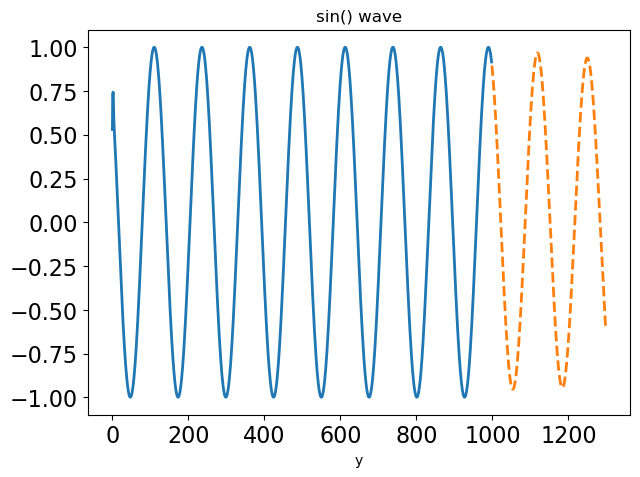

CPU times: user 196 ms, sys: 2.04 ms, total: 198 ms
Wall time: 112 ms


In [176]:
%%time 

with torch.no_grad():
    future=300
    pred = model3(test_input, future=future)
    loss = loss_func(pred[:, :-future], test_target)
    print(f'    Test Loss: {loss.item():.5f}')
    y_hat = pred.detach().numpy()

plt.figure(figsize=(7,5))
plt.title('sin() wave') 
plt.xlabel('x')
plt.xlabel('y')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(np.arange(L-1), y_hat[0,:(L-1)], linewidth=2.0)
plt.plot(L-1+np.arange(future), y_hat[0,(L-1):], '--', linewidth=2.0)
plt.show()


#### Visualize the losses and the norms of the coefficients during training

,Epoch,Loss,weight_ih_norm,weight_hh_norm,bias_ih_norm,bias_hh_norm
0,0,0.520316,0.091958,0.026817,0.026623,0.026623
1,1,0.508308,0.090780,0.025700,0.021980,0.021980
2,2,0.497120,0.093221,0.025890,0.018641,0.018641
3,3,0.486435,0.098859,0.027205,0.016232,0.016232
4,4,0.475975,0.107467,0.029560,0.014704,0.014704


,Epoch,Loss,weight_ih_norm,weight_hh_norm,bias_ih_norm,bias_hh_norm
2995,2995,0.000039,0.000544,0.001389,0.002161,0.002161
2996,2996,0.000044,0.001355,0.003583,0.005522,0.005522
2997,2997,0.000046,0.001646,0.004234,0.006556,0.006556
2998,2998,0.000043,0.001228,0.003267,0.005038,0.005038
2999,2999,0.000038,0.000466,0.001176,0.001836,0.001836


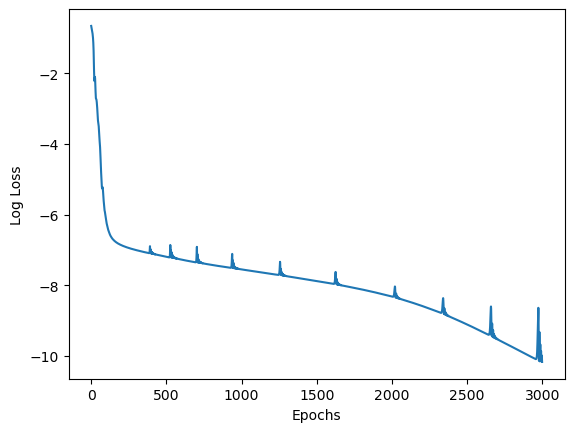

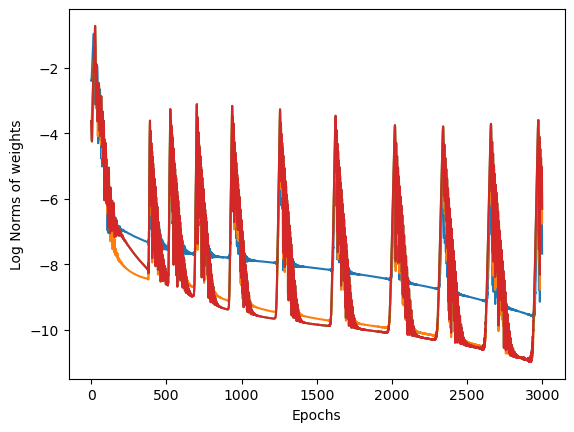

In [175]:
cols = ['Epoch', 'Loss'] 
for name, _ in model3.lstm1.named_parameters():
    cols.append(name+'_norm')

spiky_training_df = pd.DataFrame(columns = cols)

spiky_training_df['Epoch'] = epochs
spiky_training_df['Loss'] = losses
for name, _ in model3.lstm1.named_parameters():
    spiky_training_df[name+'_norm'] = weight_norms[name]

display(spiky_training_df.head())
display(spiky_training_df.tail())

plt.figure()
plt.plot(epochs, np.log(losses)) 
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.show()

plt.figure()
for name, _ in model3.lstm1.named_parameters():
    plt.plot(epochs, np.log(weight_norms[name]))
plt.xlabel('Epochs')
plt.ylabel('Log Norms of weights')
plt.show();


(these plots do raise questions) 

<br> 
<br> 
<br> 

#### Of course, the ideas behind LSTMs can be [further built upon](https://www.youtube.com/watch?v=_-gJrmIL5BE).
